In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_cr_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        36.1657 (33.5474, 42.3533) (33.4700, 41.0771)  7.6071 (Jnode 202)\n',
 't_n104        27.0856 (22.3982, 32.6831) (22.0790, 32.2574) 10.1784 (Jnode 201)\n',
 't_n105        25.8369 (21.3726, 31.1906) (21.1083, 30.8243)  9.7160 (Jnode 200)\n',
 't_n106        23.0843 (19.1208, 27.9129) (18.8014, 27.4972)  8.6957 (Jnode 199)\n',
 't_n107        22.2598 (18.4404, 26.9256) (18.1210, 26.5041)  8.3830 (Jnode 198)\n',
 't_n108        20.7797 (17.2212, 25.1731) (16.9404, 24.7800)  7.8396 (Jnode 197)\n',
 't_n109        10.2186 ( 8.4862, 12.9072) ( 8.2817, 12.5146)  4.2330 (Jnode 196)\n',
 't_n110        10.1136 ( 8.4009, 12.7750) ( 8.1795, 12.3696)  4.1902 (Jnode 195)\n',
 't_n111         9.7645 ( 8.1173, 12.3418) ( 7.9197, 11.9618)  4.0421 (Jnode 194)\n',
 't_n112         9.3153 ( 7.7476, 11.7794) ( 7.5495, 11.4024)  3.8529 (Jnode 193)\n',
 't_n113         8.8947 ( 7.4086, 11.2460) ( 7.2308, 10.8929)  3.6620 (Jnode 192)\n',
 't_n114         5.8574 ( 4.9630,  7.2833) ( 4.8358,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[36.1657,
 27.0856,
 25.8369,
 23.0843,
 22.2598,
 20.7797,
 10.2186,
 10.1136,
 9.7645,
 9.3153,
 8.8947,
 5.8574,
 3.5568,
 2.4593,
 1.6853,
 6.8487,
 5.7535,
 9.3522,
 6.1113,
 8.939,
 7.1278,
 5.7972,
 5.0464,
 8.6765,
 8.1046,
 2.4597,
 9.6347,
 8.6459,
 6.7216,
 5.3692,
 6.1749,
 5.5636,
 4.6179,
 4.5924,
 19.1738,
 15.4699,
 21.0734,
 19.1033,
 17.5159,
 14.3997,
 7.8626,
 14.0828,
 12.1402,
 10.7308,
 8.9921,
 17.2744,
 15.7845,
 4.3951,
 2.0588,
 23.8357,
 22.22,
 19.7438,
 19.2904,
 20.7412,
 13.7027,
 17.1589,
 13.3141,
 26.2399,
 24.502,
 22.1262,
 20.5697,
 17.5316,
 11.9466,
 15.3066,
 21.5134,
 7.7409,
 21.6349,
 17.9428,
 17.1356,
 16.4214,
 15.4108,
 14.1183,
 13.4038,
 12.7787,
 12.0689,
 10.6672,
 9.1561,
 7.5724,
 10.7636,
 10.082,
 8.0171,
 8.8736,
 11.9685,
 10.9934,
 10.0463,
 8.7199,
 6.2407,
 11.146,
 10.0006,
 8.6893,
 13.2648,
 12.5032,
 11.5537,
 10.1263,
 7.2168,
 11.6362,
 7.8849,
 6.2531,
 2.4667,
 17.3836,
 14.7614]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cr_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[36.329,
 27.7719,
 26.2012,
 23.2887,
 22.3207,
 20.241,
 10.3183,
 10.1715,
 9.6378,
 9.087,
 8.5257,
 5.7117,
 3.6218,
 2.4573,
 1.6742,
 6.5097,
 5.3415,
 9.0915,
 5.9765,
 8.5959,
 6.7885,
 5.4082,
 4.9909,
 8.4516,
 7.8004,
 2.6017,
 9.5659,
 8.4624,
 6.5361,
 5.1805,
 6.0053,
 5.2953,
 4.2987,
 4.7891,
 18.5836,
 15.1447,
 20.8837,
 18.7051,
 16.8622,
 13.6905,
 7.6129,
 13.5015,
 11.3896,
 9.7896,
 8.0414,
 16.9113,
 15.2471,
 4.867,
 2.2776,
 23.4882,
 21.3273,
 18.4467,
 18.0771,
 20.1717,
 13.4328,
 16.4767,
 12.4899,
 26.7118,
 24.7,
 21.9206,
 20.0892,
 17.0024,
 11.9823,
 14.5881,
 21.4213,
 8.1786,
 21.7654,
 19.2077,
 18.0516,
 17.0523,
 15.8511,
 14.274,
 13.3917,
 12.6204,
 11.662,
 10.0599,
 8.4579,
 6.9717,
 10.3059,
 9.5089,
 7.4406,
 8.117,
 11.6323,
 10.4622,
 9.3704,
 7.9553,
 5.6629,
 10.5703,
 9.3467,
 7.9988,
 13.1188,
 12.0475,
 10.9466,
 9.3583,
 6.5461,
 11.3123,
 8.1163,
 6.2941,
 2.578,
 18.3922,
 15.5434]

In [12]:
posterior_mean_iqtree

[36.1657,
 27.0856,
 25.8369,
 23.0843,
 22.2598,
 20.7797,
 10.2186,
 10.1136,
 9.7645,
 9.3153,
 8.8947,
 5.8574,
 3.5568,
 2.4593,
 1.6853,
 6.8487,
 5.7535,
 9.3522,
 6.1113,
 8.939,
 7.1278,
 5.7972,
 5.0464,
 8.6765,
 8.1046,
 2.4597,
 9.6347,
 8.6459,
 6.7216,
 5.3692,
 6.1749,
 5.5636,
 4.6179,
 4.5924,
 19.1738,
 15.4699,
 21.0734,
 19.1033,
 17.5159,
 14.3997,
 7.8626,
 14.0828,
 12.1402,
 10.7308,
 8.9921,
 17.2744,
 15.7845,
 4.3951,
 2.0588,
 23.8357,
 22.22,
 19.7438,
 19.2904,
 20.7412,
 13.7027,
 17.1589,
 13.3141,
 26.2399,
 24.502,
 22.1262,
 20.5697,
 17.5316,
 11.9466,
 15.3066,
 21.5134,
 7.7409,
 21.6349,
 17.9428,
 17.1356,
 16.4214,
 15.4108,
 14.1183,
 13.4038,
 12.7787,
 12.0689,
 10.6672,
 9.1561,
 7.5724,
 10.7636,
 10.082,
 8.0171,
 8.8736,
 11.9685,
 10.9934,
 10.0463,
 8.7199,
 6.2407,
 11.146,
 10.0006,
 8.6893,
 13.2648,
 12.5032,
 11.5537,
 10.1263,
 7.2168,
 11.6362,
 7.8849,
 6.2531,
 2.4667,
 17.3836,
 14.7614]

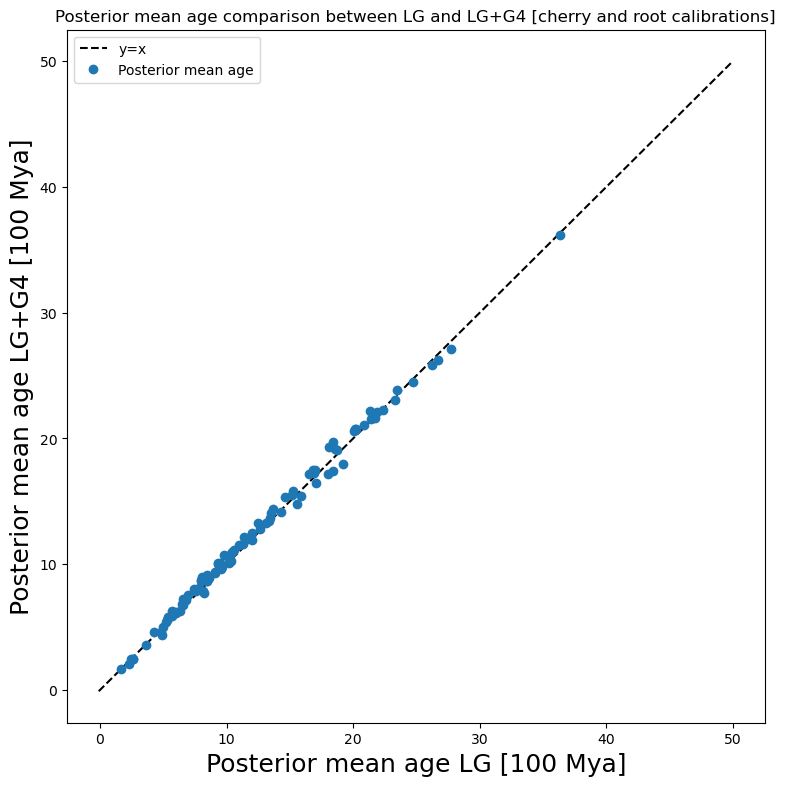

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_cr_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')